# My First Project: Investigating  a Soccer Dataset - [Database_Soccer]

## Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#data_wrangling">Data Wrangling</a></li>
<li><a href="#E.D.A">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='introduction'></a>
## Introduction
The Database_Soccer is a vast dataset sourced from Kaggle and works quite well for Machine Learning as well as Data Analysis.
### Dataset Description 
Database_Soccer contains data for soccer leagues, matches, teams and players from several European countries as of the year 2008 to the year 2016. 
The dataset consists of 7 tables called 'Country', 'League', 'Match', 'Player', 'Player Attributes', 'Team' and 'Team Attributes'.  These tables contains useful data about 11 seasons from 2008 to 2016 in different leagues including a list of players attributes and teams attributes.
Detailed match events,to mention a few, goal types, possession, corner kicks, crosses, fouls and cards for over 10,000 soccer matches.
Each record in this dataset has its table connected with the other by identification (id)numbers. The matches table consists of columns that
clearly describe the traits of each match.The columns include id, for unique identification in the table, a country_id helps to associate each match with a particular Country name pairing with the country_id,
league_id to associate the matches with a particular League, season, stage, date, match_api_id, home_team_goal and other columns in the match table described in my analysis.
The Country table contains a name paired to an id which uniquely identifies each and every league's homeground.
The player's table depicts players' id which is unique for each player, player_api_id, player_name, player_fifa_api_id, birthday, height and weight. 
Player attributes, which includes overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate, crossing, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning and gk_reflexes denotes players' abilities and helps in rating their potentials.
Team Attributes consists of team characteristics such as buildUpPlaySpeed, showing how good a team is in their build up play speed,  buildUpPlayDribbling, buildUpPlayPassing, chanceCreationPassing, chanceCreationCrossing, chanceCreationShooting,defencePressure, defenceAggression and others described in the dataset 
cell columns below.


### These are the Questions that I will focus on in my Analysis
<ol>
<li>How many total matches were played in the 2016 season?</li>
<li>Which team had the most Wins or not Draw in the 2016 season?</li>
<li>Which team had lost the fewest matches in the 2016 season?</li>
<li>Which teams had the most wins of matches in the 2016 season?</li>
<li>Which players had the most penalties?</li>
<li>What team attributes lead to the most victories? </li>
<li>How many Players have overall rating more than 90?</li>
<li>What are the attributes that contribute to the players' overall rating?</li>
    </ol>



In [1]:
%pwd

'/home/workspace'

In [2]:
# Import Statements that I will use in my Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='data_wrangling'></a>
## Data Wrangling
I now gather all the data that I will use from the csv files in Database_Soccer

In [3]:
df_country = pd.read_csv('/home/workspace/Database_Soccer/Country.csv')
df_league = pd.read_csv('/home/workspace/Database_Soccer/League.csv')
df_team = pd.read_csv('/home/workspace/Database_Soccer/Team.csv')
df_team_attribute = pd.read_csv('/home/workspace/Database_Soccer/Team_Attributes.csv')
df_match = pd.read_csv('/home/workspace/Database_Soccer/Match.csv')
df_player = pd.read_csv('/home/workspace/Database_Soccer/Player.csv')
df_player_attribute = pd.read_csv('/home/workspace/Database_Soccer/Player_Attributes.csv')

*Country Table*

In [6]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [7]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [8]:
df_country.describe()

,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


In [9]:
df_country.shape

(11, 2)

In [10]:
df_country.dtypes

id       int64
name    object
dtype: object

In [11]:
df_country.isna().sum()

id      0
name    0
dtype: int64

In [12]:
df_country.duplicated().sum()

0

All values in the Country table are unique values.

In [16]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [17]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [18]:
df_league.dtypes

id             int64
country_id     int64
name          object
dtype: object

In [19]:
df_league.shape

(11, 3)

In [20]:
df_league.duplicated().sum()

0

In [21]:
df_league.isna().sum().sum()

0

In [22]:
df_league.describe()

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


The League table has a unique identification(country_id) which maps each league to the country it is played in.

In [23]:
df_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [24]:
df_team.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [25]:
df_team.shape

(299, 5)

In [26]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [27]:
df_team.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


In [28]:
df_team.isna().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [29]:
df_team.duplicated().sum()

0

The Team table contains 11 null values in the team_fifa_api_id 

In [30]:
# Upgrading pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.9MB/s eta 0:00:01   13% |████▎                           | 1.4MB 26.9MB/s eta 0:00:01    26% |████████▌                       | 2.8MB 28.5MB/s eta 0:00:01    52% |████████████████▉               | 5.5MB 28.5MB/s eta 0:00:01    65% |█████████████████████           | 6.9MB 28.7MB/s eta 0:00:01    78% |█████████████████████████       | 8.2MB 26.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.4MB/s eta 0:00:01   51% |████████████████▋               | 7.0MB 26.2MB/s eta 0:00:01    70% |██████████████████████▌         | 9.4MB 26.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


Team_attribute Table

In [31]:
df_team_attribute

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,...,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


In [32]:
df_team_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [33]:
df_team_attribute.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [34]:
df_team_attribute.dtypes

id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass             

In [35]:
df_team_attribute.shape

(1458, 25)

In [36]:
df_team_attribute.isna().sum().sum()

969

In [37]:
df_team_attribute.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [38]:
df_team_attribute.duplicated().sum()

0

In [39]:
df_team_attribute.dtypes

id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass             

The team_attribute Table consists of 969 BuildUpPlayDribbling null values.

The Match Table

In [40]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [41]:
df_match.tail()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [43]:
df_match.shape

(25979, 115)

In [44]:
df_match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [45]:
df_match.isna().sum().sum()

407395

In [46]:
df_match.duplicated().sum().sum()

0

In [47]:
df_match.dtypes

id                    int64
country_id            int64
league_id             int64
season               object
stage                 int64
date                 object
match_api_id          int64
home_team_api_id      int64
away_team_api_id      int64
home_team_goal        int64
away_team_goal        int64
home_player_X1      float64
home_player_X2      float64
home_player_X3      float64
home_player_X4      float64
home_player_X5      float64
home_player_X6      float64
home_player_X7      float64
home_player_X8      float64
home_player_X9      float64
home_player_X10     float64
home_player_X11     float64
away_player_X1      float64
away_player_X2      float64
away_player_X3      float64
away_player_X4      float64
away_player_X5      float64
away_player_X6      float64
away_player_X7      float64
away_player_X8      float64
                     ...   
B365H               float64
B365D               float64
B365A               float64
BWH                 float64
BWD                 

In [48]:
df_match.isna().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

This Match Table consists of 407395 null values.


The Player Table

In [49]:
df_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [50]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [51]:
df_player.shape

(11060, 7)

In [52]:
df_player.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [53]:
df_player.isna().sum().sum()

0

In [54]:
df_player.duplicated().sum()

0

In [55]:
df_player.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

There are 11060 players in the Player Table

The player_attribute Table

In [56]:
df_player_attribute

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [57]:
df_player_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [58]:
df_player_attribute.shape

(183978, 42)

In [59]:
df_player_attribute.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [60]:
df_player_attribute.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [61]:
df_player_attribute.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [62]:
df_player_attribute.duplicated().sum()

0

In [63]:
df_player_attribute.isna().sum().sum()

47301

There are 47301 null values in the player_attribute table.

# Results for my Analysis:
*From the analysis I did, I found out that:*

<ul>
<li>There are 25979 total matches.</li>
<li>There are 11,060 total players.</li>
<li>There are 11 Countries with their lead championship thus 11 leagues.</li>
<li>The Seasons are from 2008 to 2016.</li>
<li>There are 183978 total player_attributes'.</li>
<li>There are 1458 total team_attributes.</li>
</ul>

**I summarized the analysis in the table below:**

| Table        |Records   | Columns |
| -------------|:-------------:| ------------:|
| Country      |11             |2             |
| League       |11             |3             |
| Match        |25979          |115           |
| Player       |11060         |7            |
| Player_Attributes|183978     |42            |
| Team        |299             |5             |
|Team_Attributes|1458          |25            |


### Data Cleaning
<ol>
    <li>Cleaning the Match Table</li>
</ol>
 

*I start by indicating the columns I need to use in this analysis.*

In [64]:
df_match=df_match.loc[:,:'away_team_goal']

*I will then convert date to DateTime type inorder to gain availability to dedicate a year of each date*

In [65]:
df_match['date'] = pd.to_datetime(df_match['date'])

*I will then add new columns to match table store years*

In [66]:
df_match['season_year'] = df_match['date'].dt.year

*Then I'll print the maximum and the minimum year in season year column*

In [67]:
str(df_match['season_year'].min()) + " : " + str(df_match['season_year'].max())

'2008 : 2016'

*I will rename the column: name to country_name*

In [68]:
df_country.rename(columns={'name' : 'country_name', }, inplace=True)

*I then join df_match with country table using the inner join type*

In [69]:
df_match = df_match.merge(df_country, how='inner', left_on= "country_id", right_on = "id")

*I then drop column id_y*

In [70]:
df_match.drop(columns=['id_y'], inplace=True)

*I will now rename column id_x to id*

In [71]:
df_match.rename(columns={'id_x' : 'id'}, inplace=True)

In [72]:
#I then display a sample dataset 
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_year,country_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,Belgium
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,2008,Belgium
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,2008,Belgium
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,2008,Belgium


*As you can visualize, the table has been updated. I'll now join df_match with team table by inner join type for home team*

In [73]:
df_match = df_match.merge(df_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')

*Then I rename the column team_long_name to home_team_name*

In [74]:
df_match.rename(columns={'team_long_name': 'home_team_name','country_name_x'  : 'country_name' , 'id_x' : 'id'}, inplace=True)

*Now I drop column home_team_api_id and team_api_id*

In [75]:
df_match.drop(columns=['home_team_api_id', 'team_api_id', 'id_y'], axis=1, inplace=True)

In [76]:
#Displaying the updated dataset sample
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,season_year,country_name,team_fifa_api_id,home_team_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9993,1,1,2008,Belgium,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15,492583,9999,1,1,2008,Belgium,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29,492651,9984,3,2,2008,Belgium,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13,492713,9986,1,0,2008,Belgium,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24,492805,9998,2,0,2009,Belgium,673.0,KRC Genk,GEN


*The Changes have taken place effectively. Moving on with cleaning, I will now join df_match with team table by left join type for away team*

In [77]:
df_match = df_match.merge(df_team, how='left', left_on='away_team_api_id', right_on='team_api_id')

*Then I rename the column: team_long_name to away_team_name , id_x to id*

In [78]:
df_match.rename(columns={'team_long_name': 'away_team_name', 'id_x' : 'id'}, inplace=True)

*I will drop unnecessary columns*

In [79]:
df_match.drop(columns=['team_api_id', 'away_team_api_id','team_fifa_api_id_x', 'team_fifa_api_id_y','team_fifa_api_id_y','team_short_name_y','id_y'], axis=1, inplace=True)

*Then I can display the info of the sample*

In [80]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 14 columns):
id                   25979 non-null int64
country_id           25979 non-null int64
league_id            25979 non-null int64
season               25979 non-null object
stage                25979 non-null int64
date                 25979 non-null datetime64[ns]
match_api_id         25979 non-null int64
home_team_goal       25979 non-null int64
away_team_goal       25979 non-null int64
season_year          25979 non-null int64
country_name         25979 non-null object
home_team_name       25979 non-null object
team_short_name_x    25979 non-null object
away_team_name       25979 non-null object
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 3.0+ MB


*I can now join df_match with league table by inner join type for the away team,  renaming the two columns 'name' and 'id'*

In [82]:
df_league.rename(columns={'name': 'league_name', 'id': 'league_id'}, inplace=True)

*I then join df_match with league table using inner join type for the away team*

In [83]:
df_match = df_match.merge(df_league, how='inner', on='league_id')

*I will now drop country_id and league_id*

In [84]:
df_match.drop(columns=["league_id","country_id_y" , "country_id_x"], inplace=True)

The sample of the updated dataset is:

In [85]:
df_match.describe()

,id,stage,match_api_id,home_team_goal,away_team_goal,season_year
count,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000
mean,12990.000000,18.242773,1.195429e+06,1.544594,1.160938,2011.998653
std,7499.635658,10.407354,4.946279e+05,1.297158,1.142110,2.354741
min,1.000000,1.000000,4.831290e+05,0.000000,0.000000,2008.000000
25%,6495.500000,9.000000,7.684365e+05,1.000000,0.000000,2010.000000
50%,12990.000000,18.000000,1.147511e+06,1.000000,1.000000,2012.000000
75%,19484.500000,27.000000,1.709852e+06,2.000000,2.000000,2014.000000
max,25979.000000,38.000000,2.216672e+06,10.000000,9.000000,2016.000000


*I need to check on any missed value before I start my analysis*

In [86]:
df_match.isna().sum().sum()

0

*Since there are no missed values, I can assume that my Match table is clean, and move on to Player's table*

<ol><li>2.Cleaning Player Table</li></ol>


*I will start by joining df_player with df_player_attribute table by inner join type to easily find player name with attributes*

In [87]:
df_player = df_player.merge(df_player_attribute, on=['player_api_id','player_fifa_api_id'], how = "inner")

*I then rename the column: id_x to id*

In [88]:
df_player.rename(columns={'id_x' : 'id'}, inplace=True)

*I then drop column id_y, player_api_id, player_fifa_api_id*

In [89]:
df_player.drop(columns=["id_y","player_api_id" , "player_fifa_api_id"], inplace=True)

Then display the sample of the updated player info section.

In [90]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183766 entries, 0 to 183765
Data columns (total 44 columns):
id                     183766 non-null int64
player_name            183766 non-null object
birthday               183766 non-null object
height                 183766 non-null float64
weight                 183766 non-null int64
date                   183766 non-null object
overall_rating         183016 non-null float64
potential              183016 non-null float64
preferred_foot         183016 non-null object
attacking_work_rate    180622 non-null object
defensive_work_rate    183016 non-null object
crossing               183016 non-null float64
finishing              183016 non-null float64
heading_accuracy       183016 non-null float64
short_passing          183016 non-null float64
volleys                181139 non-null float64
dribbling              183016 non-null float64
curve                  181139 non-null float64
free_kick_accuracy     183016 non-null float64
long_p

*I need to dedupe the records that are duplicated*

In [91]:
df_player.drop_duplicates(inplace = True)

*I will then drop records that have missed value*

In [92]:
df_player.dropna(inplace=True)

*Checking for missed values before the start of my analysis is necessary*

In [93]:
df_player.isna().sum().sum()

0

<ol><li>3.Cleaning Team Table</li></ol>

*I will start by dropping a buildUpPlayDribbling column which has most missed values in team table*

In [94]:
df_team_attribute.drop(columns=['buildUpPlayDribbling'], axis=1, inplace=True)

*I now have to join df_team with df_team_attribute table by inner join type to easy merge name of teams beside their distinguishing attributes*

In [95]:
df_team = df_team.merge(df_team_attribute , on = ['team_api_id','team_fifa_api_id'], how = 'inner')

*Then I can now drop column id_y,team_api_id, team_fifa_api_id, team_short_name*

In [96]:
df_team.drop(columns=["id_y","team_api_id" , "team_fifa_api_id","team_short_name"], inplace=True)

*I will now rename the column: id_x to id* 

In [97]:
df_team.rename(columns={'id_x': 'id'}, inplace=True)

*Now I can show the information of this table*

In [98]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180228 entries, 0 to 183765
Data columns (total 44 columns):
id                     180228 non-null int64
player_name            180228 non-null object
birthday               180228 non-null object
height                 180228 non-null float64
weight                 180228 non-null int64
date                   180228 non-null object
overall_rating         180228 non-null float64
potential              180228 non-null float64
preferred_foot         180228 non-null object
attacking_work_rate    180228 non-null object
defensive_work_rate    180228 non-null object
crossing               180228 non-null float64
finishing              180228 non-null float64
heading_accuracy       180228 non-null float64
short_passing          180228 non-null float64
volleys                180228 non-null float64
dribbling              180228 non-null float64
curve                  180228 non-null float64
free_kick_accuracy     180228 non-null float64
long_p

*I will then add new columns to team table store years*

*I will convert date to datetime type to get year easily*

In [99]:
df_team['date'] = pd.to_datetime(df_team['date']) 

In [100]:
df_team['year'] = df_team['date'].dt.year

*I will drop records that have a missed value*

In [101]:
df_team.dropna(inplace=True)

*I will also dedupe duplicated records*

In [102]:
df_team.drop_duplicates(inplace = True)

Now I can check for the description of this updated table

In [103]:
df_team.describe()

,id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,year
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,22708.422787,52.463967,48.489362,52.166781,53.734386,53.971860,46.017845,49.253946,52.187371,2012.505148
std,15008.544877,11.549653,10.899771,10.364195,11.090171,10.330588,10.230702,9.740734,9.577828,1.708538
min,1.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,2010.000000
25%,9548.000000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000,2011.000000
50%,20525.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000,2013.000000
75%,35294.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000,2014.000000
max,50204.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000,2015.000000


*As usual I will check for any missed value before I start my analysis*

In [104]:
df_team.isna().sum().sum()

0

<a id='E.D.A'></a>
## Exploratory Data Analysis
This is where I will explore my dataset in order to later augment it to maximize the potential of my analysis and identification of patterns by visualization
This Analysis assists me in understanding the variables and relationship between them, discovering errors and missing values in the data. 

### 1.How many total matches were played in the 2016 season?

*I will find out how many matches were played in 2016 season. First, I'll create a new fuction which return the name of winner team from every match*

In [106]:
def win(df_match):
    home_score = df_match[0] #home_team_goal
    away_score = df_match[1] #away_team_goal
    home_team_name = df_match[2] #home_team_name
    away_team_name = df_match[3] #away_team_name
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'DRAW'

*I'll now add new column which will store winners team within 'win' function*

In [107]:
df_match['winner']  = df_match[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(win, axis=1)

*Then I filter the matches that were only played in the 2015/2016 season*

In [108]:
match_2016 = df_match[df_match['season'] == '2015/2016'] 

*I then count every match played in each league during the 2015/2016 season*

In [109]:
match_Played = match_2016.groupby('league_name')['home_team_name'].count().sort_values()

In [110]:
match_Played

league_name
Switzerland Super League    180
Scotland Premier League     228
Belgium Jupiler League      240
Poland Ekstraklasa          240
Germany 1. Bundesliga       306
Netherlands Eredivisie      306
Portugal Liga ZON Sagres    306
England Premier League      380
France Ligue 1              380
Italy Serie A               380
Spain LIGA BBVA             380
Name: home_team_name, dtype: int64

Figuring out the results:

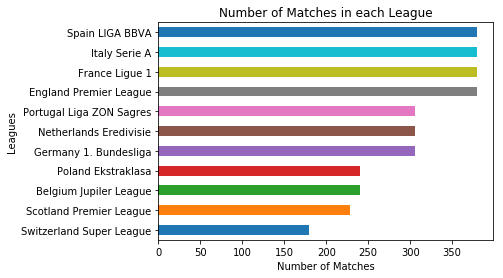

In [113]:
match_Played.plot(kind='barh', title='Number of Matches in each League');
plt.xlabel('Number of Matches');
plt.ylabel('Leagues');

### 2.Which team had the most Wins or not Draw in the 2016 season?

*Here, I will concentrate with statistics of the most offensive league*

In [122]:
wins16 = match_2016.groupby(["league_name"]).apply(lambda x: (x["winner"]!= 'DRAW').sum()).reset_index(name='winner').sort_values('winner')
wins16

,league_name,winner
10,Switzerland Super League,133
6,Poland Ekstraklasa,166
8,Scotland Premier League,176
0,Belgium Jupiler League,181
7,Portugal Liga ZON Sagres,230
5,Netherlands Eredivisie,232
3,Germany 1. Bundesliga,235
2,France Ligue 1,272
1,England Premier League,273
4,Italy Serie A,285


*Figuring the results I get*

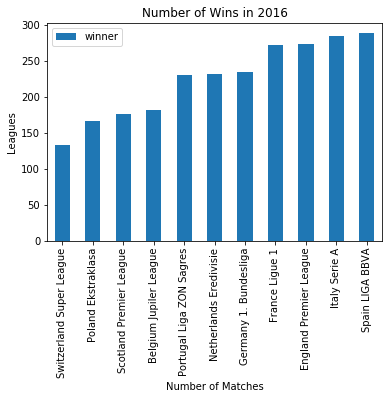

In [124]:
wins16.plot(x= 'league_name' ,kind='bar', title='Number of Wins in 2016');
plt.xlabel('Number of Matches');
plt.ylabel('Leagues');

### 3.Which team had lost the fewest matches in the 2016 season?

*I will get an impression of the league with a great defense and a great goalkeeper*

*I will add a new column for loser teams within the lose function*

In [129]:
def lose(df_match):
    home_score = df_match[0] #home_team_goal
    away_score = df_match[1] #away_team_goal
    home_team_name = df_match[2] #home_team_name
    away_team_name = df_match[3] #away_team_name
    
    if home_score < away_score:
        return home_team_name
    elif home_score > away_score:
        return away_team_name
    else:
        return 'DRAW'

In [130]:
df_match['loser']  = df_match[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(lose, axis=1)

*Then I can now visualize the result via Matplotlib*

In [131]:
match_2016 = df_match[df_match['season'] == '2015/2016'] 

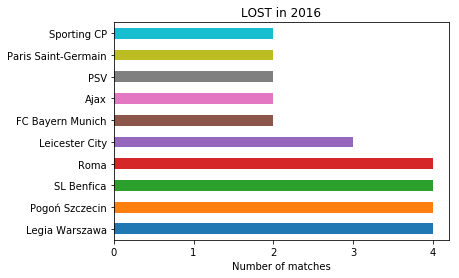

In [132]:
match_2016.loser.value_counts().tail(10).plot(kind='barh', title='LOST in 2016',xticks = [0,1,2,3,4])
plt.xlabel('Number of matches');

### 4.Which teams had the most wins of matches in the 2016 season?

*Now I will discover the topmost teams in all leagues and get an impression of the team with the most dangerous attacking legacy* 

In [133]:
wins_16 = match_2016.winner.value_counts().head(10).iloc[1:]
wins_16

Paris Saint-Germain    30
SL Benfica             29
FC Barcelona           29
Juventus               29
Real Madrid CF         28
FC Bayern Munich       28
Atlético Madrid        28
Sporting CP            27
FC Basel               26
Name: winner, dtype: int64

I'll figure the results using matplotlib as:

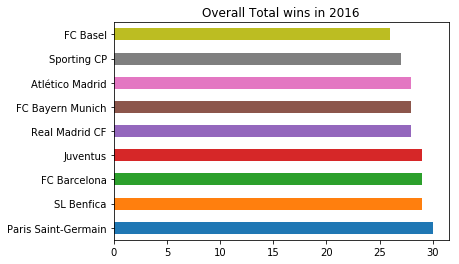

In [134]:
wins_16.plot(kind='barh', title='Overall Total wins in 2016');

### 5.Which players had the most penalties?

I will take the last date, which contains the largest glands of penalty kicks, since the data contains order of penalties for each player.

 *I will then select a top player's name and their penalties in descending order*

In [143]:
most_penalties = df_player.groupby(['player_name'])['penalties'].max().sort_values(ascending=False)
most_penalties[:10]

player_name
Rickie Lambert     96.0
Mario Balotelli    95.0
Xavi Hernandez     95.0
Andrea Pirlo       95.0
Paul Scholes       95.0
David Trezeguet    94.0
Cesc Fabregas      94.0
Adrian Mutu        94.0
Iker Casillas      94.0
Hernan Crespo      93.0
Name: penalties, dtype: float64

I can now figure out the results in a Histogram

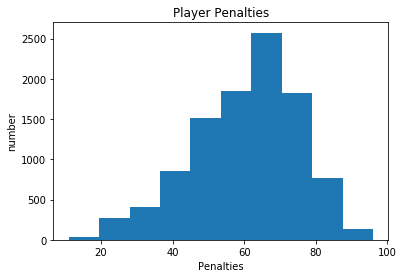

In [144]:
most_penalties.plot(kind='hist', title='Player Penalties');
plt.xlabel('Penalties');
plt.ylabel('number');

### 6.What team attributes lead to the most victories?

I analyze data of the top 10 winner team to discover the attributes that led to the most victories

*I will select a top team  that most winner in 2015/2016*

In [146]:
top_teams = df_team[(df_team["team_long_name"].isin(wins_16.index)) & (df_team['year'] == 2015)]

*Then I can now show the teams which have the most wins in 2016*

In [148]:
top_teams

,id,team_long_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
370,9548,Paris Saint-Germain,2015-09-10,49,Balanced,Normal,34,Mixed,Organised,62,...,Normal,Organised,57,Medium,53,Press,56,Normal,Cover,2015
497,15617,FC Bayern Munich,2015-09-10,45,Balanced,Little,28,Short,Free Form,37,...,Little,Free Form,72,High,53,Press,59,Normal,Cover,2015
716,20522,Juventus,2015-09-10,50,Balanced,Normal,20,Short,Organised,65,...,Lots,Organised,35,Medium,65,Press,35,Normal,Cover,2015
1052,35285,Sporting CP,2015-09-10,57,Balanced,Normal,56,Mixed,Organised,42,...,Normal,Organised,60,Medium,60,Press,54,Normal,Cover,2015
1094,35294,SL Benfica,2015-09-10,69,Fast,Normal,53,Mixed,Organised,65,...,Normal,Organised,60,Medium,57,Press,54,Normal,Cover,2015
1244,43040,Real Madrid CF,2015-09-10,50,Balanced,Normal,46,Mixed,Free Form,61,...,Normal,Free Form,52,Medium,60,Press,63,Normal,Cover,2015
1256,43042,FC Barcelona,2015-09-10,36,Balanced,Normal,51,Mixed,Free Form,36,...,Normal,Free Form,61,Medium,65,Press,65,Normal,Cover,2015
1321,43053,Atlético Madrid,2015-09-10,57,Balanced,Normal,50,Mixed,Organised,61,...,Normal,Organised,49,Medium,42,Press,52,Normal,Cover,2015
1415,49118,FC Basel,2015-09-10,61,Balanced,Normal,46,Mixed,Organised,66,...,Normal,Organised,47,Medium,58,Press,53,Normal,Cover,2015


*I will now list all column names that store digital values*

In [151]:
digital_attributes = ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayPassing','chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting','defencePressure', 'defenceAggression', 'defenceTeamWidth']

I will then display a sample of top_teams with only digital columns

In [152]:
top_teams[digital_attributes].head()

,team_long_name,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
370,Paris Saint-Germain,49,34,62,61,35,57,53,56
497,FC Bayern Munich,45,28,37,31,22,72,53,59
716,Juventus,50,20,65,50,80,35,65,35
1052,Sporting CP,57,56,42,50,55,60,60,54
1094,SL Benfica,69,53,65,66,54,60,57,54


*Now I can figure the results with the help of Matplotlib with these steps:*
* I will first create a new bar character*
* I will set the y axis label and the chart's title *
* I will then set the x axis label to enhance graph readability *

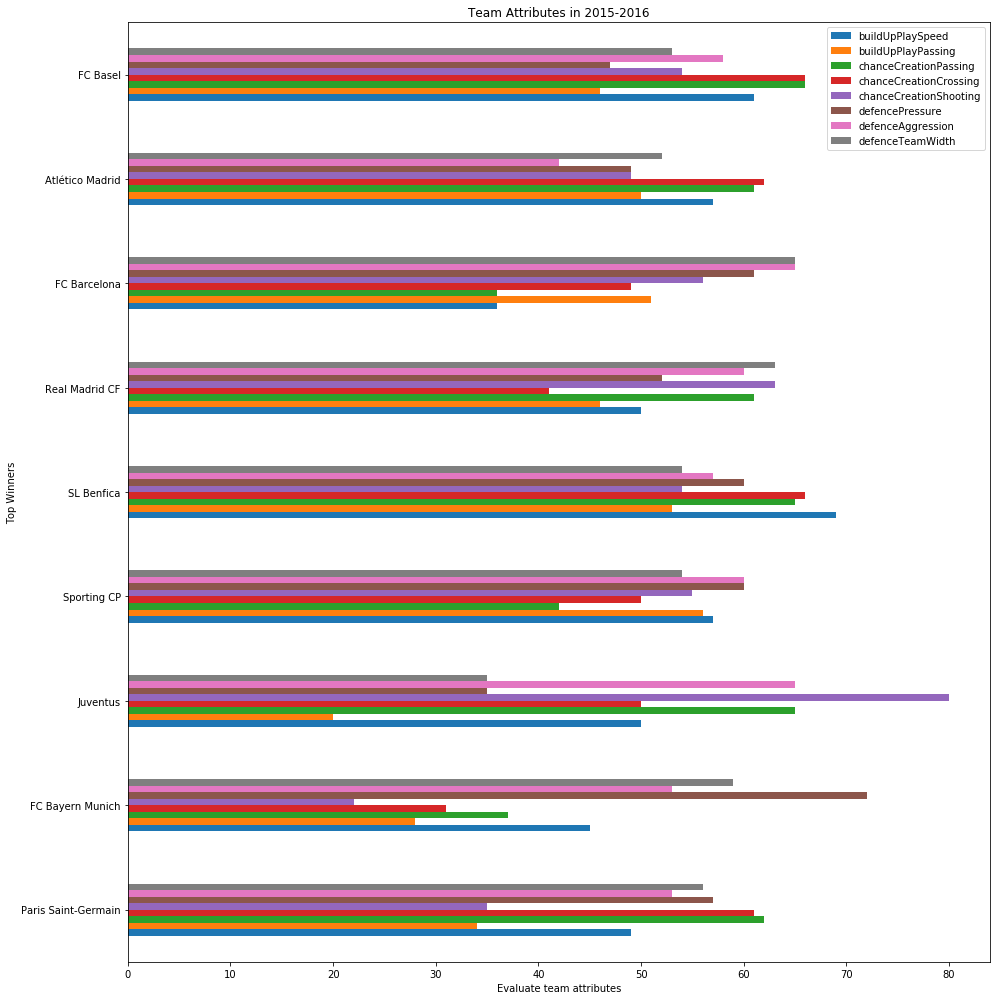

In [154]:
fig, ax = plt.subplots(figsize=(14, 14))
ax = top_teams[digital_attributes].plot.barh(ax=ax);
ax.set_yticklabels(top_teams['team_long_name'])
ax.set_ylabel('Top Winners')
ax.set_title('Team Attributes in 2015-2016')
plt.xlabel("Evaluate team attributes")
plt.tight_layout();

*I will now list all columns name store descriptive values*

In [155]:
descriptive_attributes = ['buildUpPlaySpeedClass','buildUpPlayDribblingClass','buildUpPlayPassingClass','buildUpPlayPositioningClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']
attr = top_teams[descriptive_attributes]

*I will discover the descriptive values in pie chart:*

* I will create the first chart.

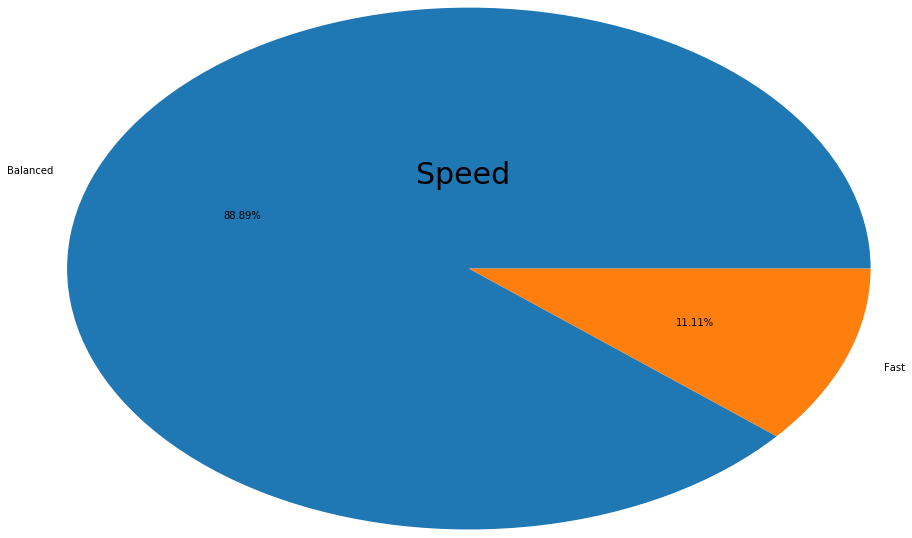

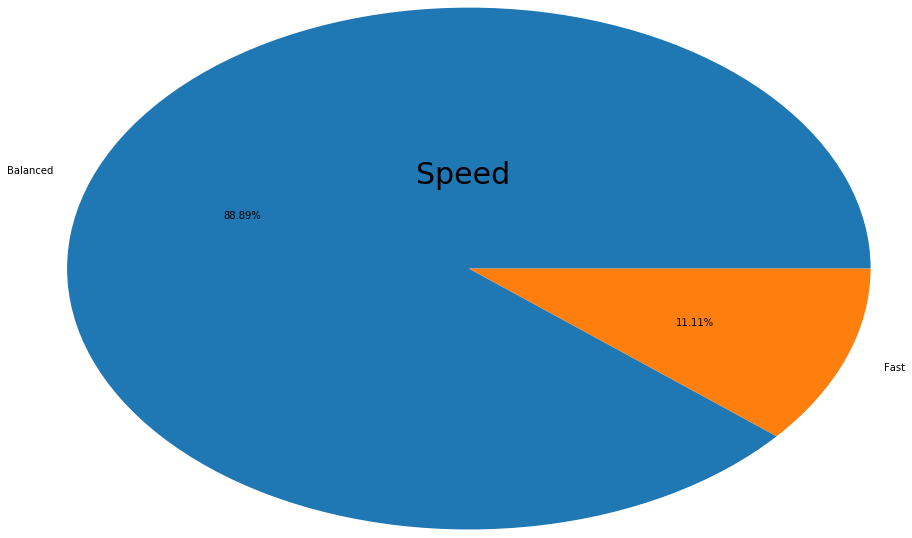

In [156]:
plt.pie(attr['buildUpPlaySpeedClass'].value_counts(), labels =  attr['buildUpPlaySpeedClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Speed',fontsize=30,ha='center')
plt.figure(1)

* I will create the second chart

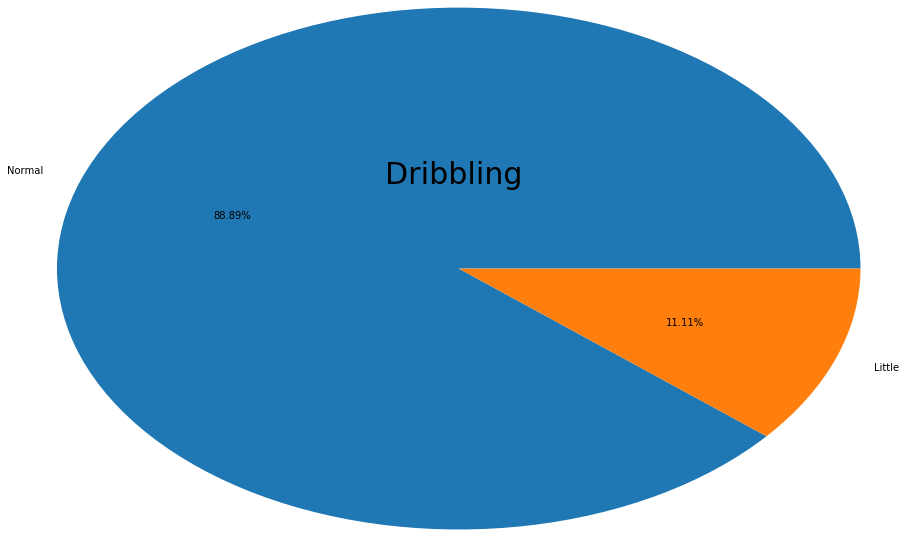

In [159]:
plt.pie(attr['buildUpPlayDribblingClass'].value_counts(), labels =  attr['buildUpPlayDribblingClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Dribbling',fontsize=30,ha='center')
plt.show() #To show all figures

* I will create the third chart

Text(0.5,0.8,'Passing')

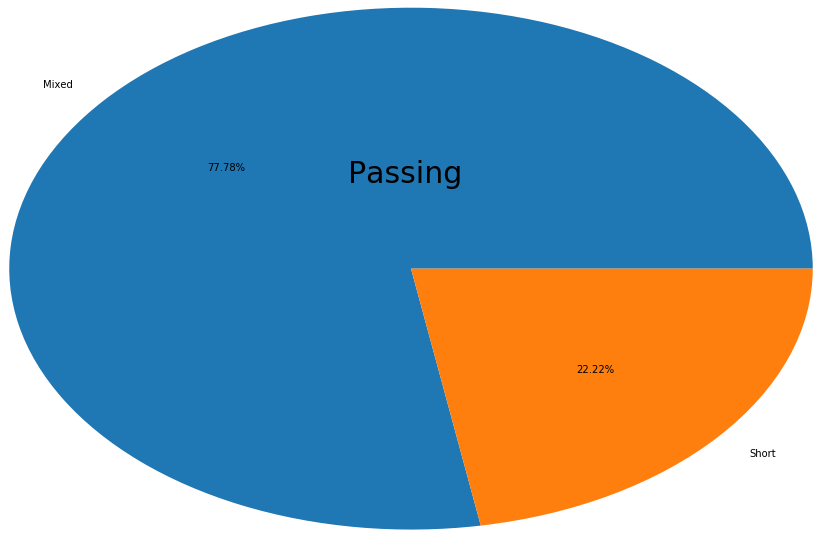

In [160]:
plt.pie(attr['buildUpPlayPassingClass'].value_counts(), labels =  attr['buildUpPlayPassingClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Passing',fontsize=30,ha='center')

* I will create the fourth chart

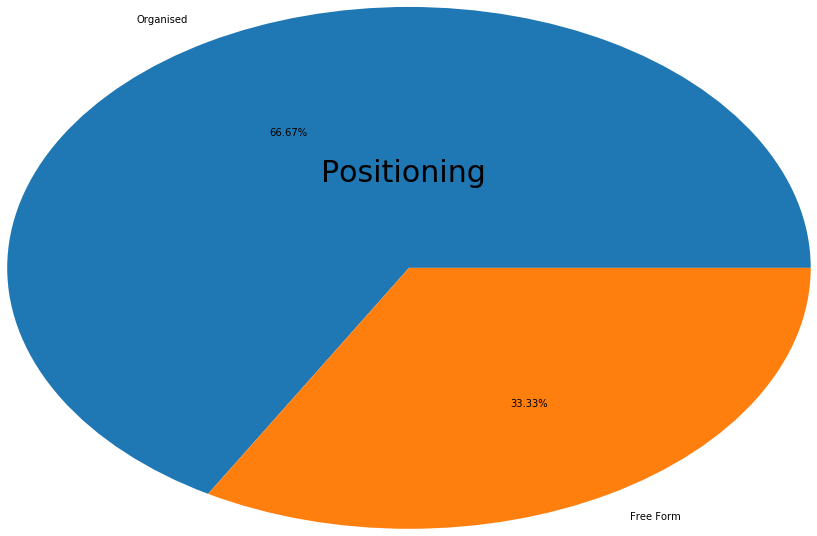

In [161]:
plt.figure(3)
plt.pie(attr['buildUpPlayPositioningClass'].value_counts(), labels =  attr['buildUpPlayPositioningClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Positioning',fontsize=30,ha='center')
plt.show()

* I will create the fifth chart

Text(0.5,0.8,'Shooting')

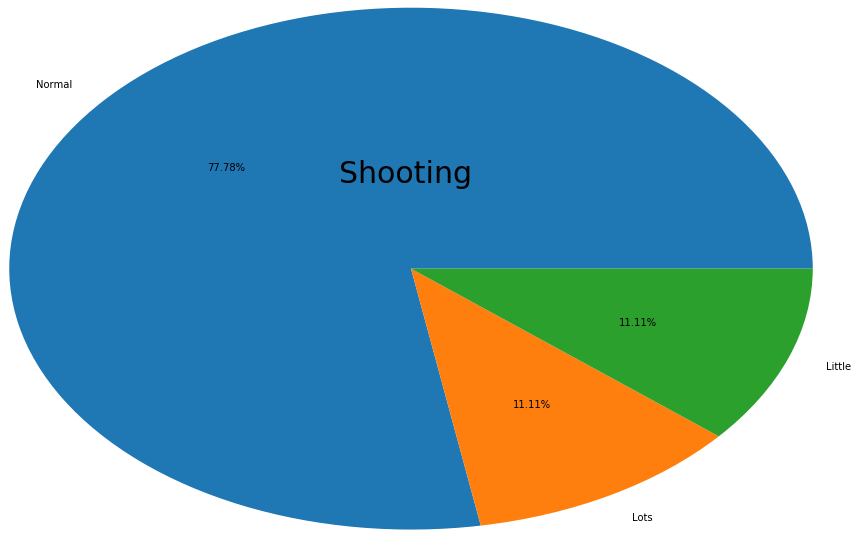

In [162]:
plt.figure(4)
plt.pie(attr['chanceCreationShootingClass'].value_counts(), labels =  attr['chanceCreationShootingClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Shooting',fontsize=30,ha='center')

* I will create the sixth chart 

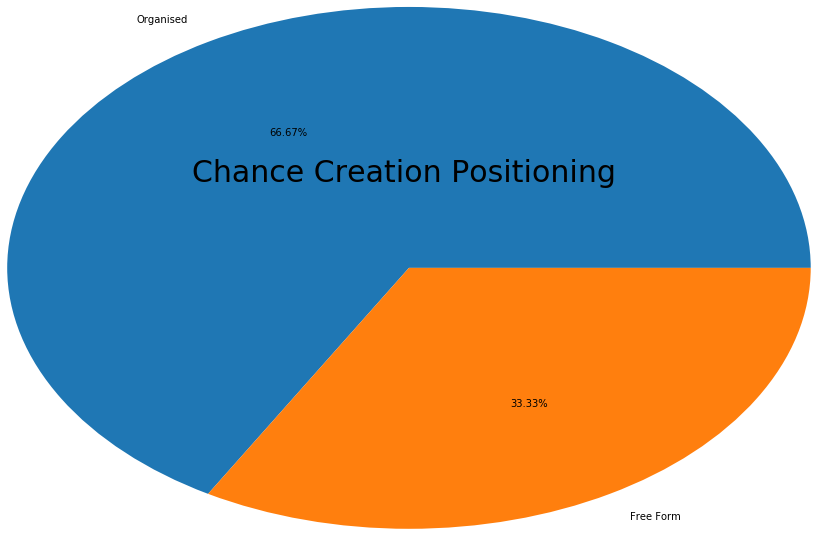

In [163]:
plt.figure(5)
plt.pie(attr['chanceCreationPositioningClass'].value_counts(), labels =  attr['chanceCreationPositioningClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Chance Creation Positioning',fontsize=30,ha='center')
plt.show()

* I will create the seventh chart

Text(0.5,0.8,'Defence Pressure')

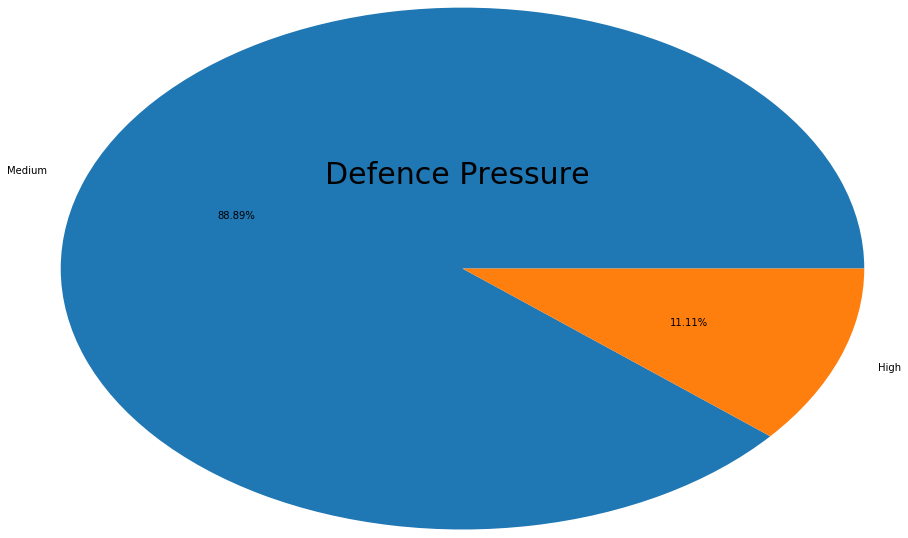

In [164]:
plt.figure(6)
plt.pie(attr['defencePressureClass'].value_counts(), labels =  attr['defencePressureClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Defence Pressure',fontsize=30,ha='center')

* I will create the eighth chart

Text(0.5,0.8,'Defence Aggression')

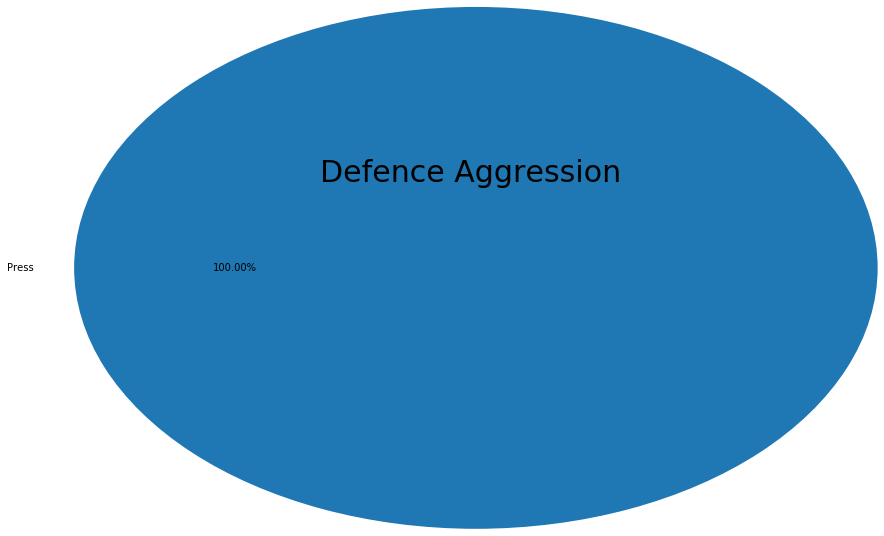

In [165]:
plt.figure(7)
plt.pie(attr['defenceAggressionClass'].value_counts(), labels =  attr['defenceAggressionClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Defence Aggression',fontsize=30,ha='center')

* I will create my ninth chart

Text(0.5,0.8,'Defence Team Width')

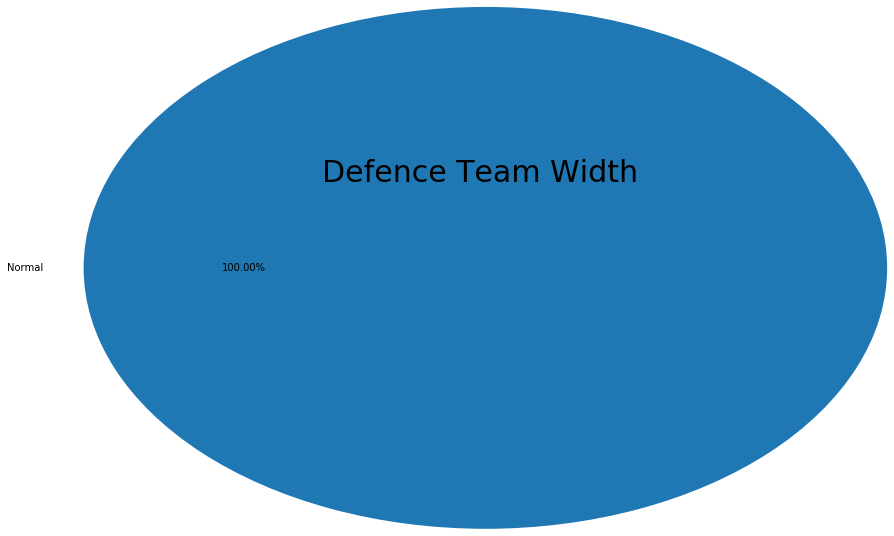

In [168]:
plt.figure(8)
plt.pie(attr['defenceTeamWidthClass'].value_counts(), labels =  attr['defenceTeamWidthClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Defence Team Width',fontsize=30,ha='center')

* I will create my tenth chart

Text(0.5,0.8,'Defence Defender Line')

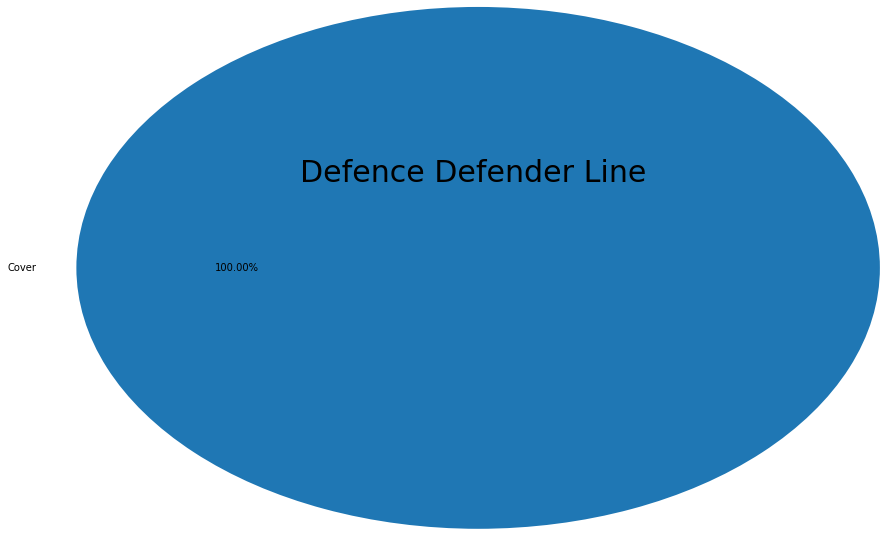

In [169]:
plt.figure(9)
plt.pie(attr['defenceDefenderLineClass'].value_counts(), labels =  attr['defenceDefenderLineClass'].value_counts().index,autopct='%1.2f%%', radius=3)
plt.figtext(.5,.8,'Defence Defender Line',fontsize=30,ha='center')

### 7.How many Players have overall rating more than 90 ?

*First, I will select maximum rate*

In [170]:
df_player['overall_rating'].max()

94.0

*Then I will have a look at average of players' overall rating*

In [171]:
average_rate = df_player['overall_rating'].mean()
average_rate

68.63280955234481

*I selected players with above average rating*

In [172]:
above_rating = df_player[df_player['overall_rating'] > average_rate]
above_rating.player_name.nunique()

6467

In [173]:
pd.DataFrame(above_rating.describe())

,id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,...,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000,92330.000000
mean,5495.301581,181.792446,169.326297,74.063327,77.486483,60.008448,54.887653,61.293437,67.580721,54.744211,...,63.073324,59.687805,49.134669,53.315964,50.452258,14.968255,16.015423,21.099816,16.103487,16.401451
std,3197.477408,6.495631,15.240113,4.062179,4.885856,17.642107,19.567213,16.958848,13.712474,18.820248,...,14.748551,15.682882,23.032996,23.009894,23.244323,17.870179,16.911536,22.761531,17.230575,18.294800
min,2.000000,157.480000,117.000000,69.000000,59.000000,3.000000,1.000000,1.000000,7.000000,2.000000,...,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2741.000000,177.800000,159.000000,71.000000,74.000000,52.000000,40.000000,54.000000,64.000000,42.000000,...,56.000000,51.000000,25.000000,30.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,5457.000000,182.880000,170.000000,73.000000,77.000000,65.000000,60.000000,65.000000,71.000000,59.000000,...,66.000000,63.000000,53.000000,60.000000,56.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,8229.000000,185.420000,179.000000,76.000000,81.000000,72.000000,70.000000,73.000000,76.000000,69.000000,...,73.000000,71.000000,71.000000,74.000000,72.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,11075.000000,203.200000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


*I can now filter the data, initialize the figure, create a plot, set title and label then finally show the plot.*

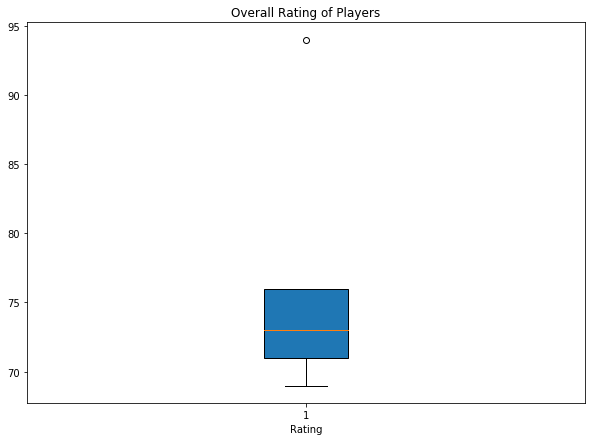

In [174]:
# Filter data
data = above_rating.describe().loc['min':'max',"overall_rating"]
# initialize the figure
fig = plt.figure(figsize =(10, 7))
# Create a plot
plt.boxplot(data,vert=True,patch_artist=True  ) 
#set title and label
plt.title("Overall Rating of Players")
plt.xlabel('Rating')
# show the plot
plt.show()

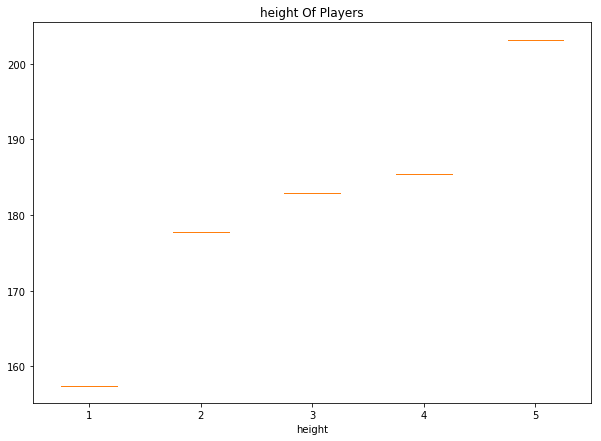

In [175]:
data = pd.DataFrame(above_rating.describe().loc['min':'max',"height"])
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data,vert=True,patch_artist=True ) 
plt.title("height Of Players")
plt.xlabel('height')
plt.show()

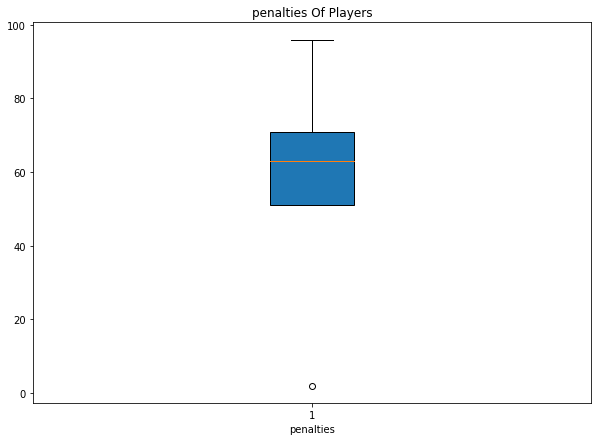

In [176]:
data = above_rating.describe().loc['min':'max',"penalties"]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data,vert=True,patch_artist=True ) 
plt.title("penalties Of Players")
plt.xlabel('penalties')
plt.show()

*Players with an overall rating of more than 90*

In [177]:
df_player[(df_player['overall_rating'] > 90)].player_name.nunique()

12

### 8.What are the attributes that contribute to the players' overall rating?

*Now I figure out which attributes affect the Rating of the player, either bad or good effects.*

I will start with the correlation between heading accuracy and rating.

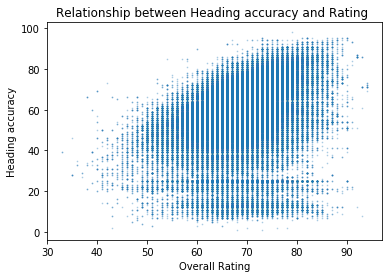

In [178]:
df_player.plot(x='overall_rating', y='heading_accuracy', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Heading accuracy and Rating ')
plt.xlabel('Overall Rating');
plt.ylabel('Heading accuracy');

I then visualize correlation between free kick accuracy and rating

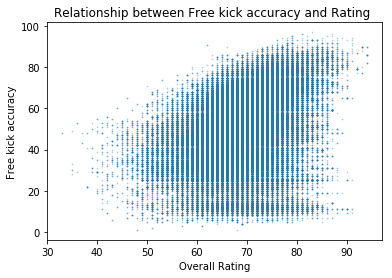

In [179]:
df_player.plot(x='overall_rating', y='free_kick_accuracy', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Free kick accuracy and Rating ')
plt.xlabel('Overall Rating')
plt.ylabel('Free kick accuracy');

Correlation between  ball control and rating 

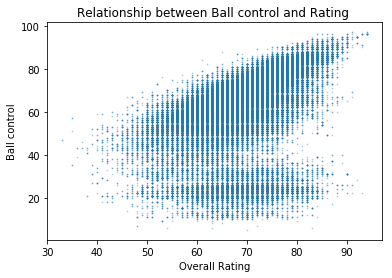

In [181]:
df_player.plot(x='overall_rating', y='ball_control', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Ball control and Rating ')
plt.xlabel('Overall Rating')
plt.ylabel('Ball control');

Correlation between long shots and rating 

Text(0,0.5,'Long shots')

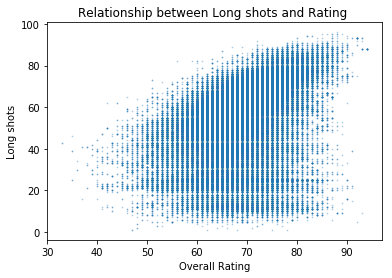

In [182]:
df_player.plot(x='overall_rating', y='long_shots', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Long shots and Rating ')
plt.xlabel('Overall Rating')
plt.ylabel('Long shots')

Correlation between shot power and rating 

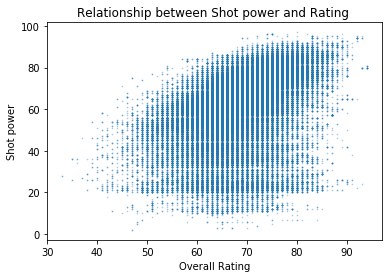

In [183]:
df_player.plot(x='overall_rating', y='shot_power', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Shot power and Rating ');
plt.xlabel('Overall Rating')
plt.ylabel('Shot power');

Correlation between marking and rating 

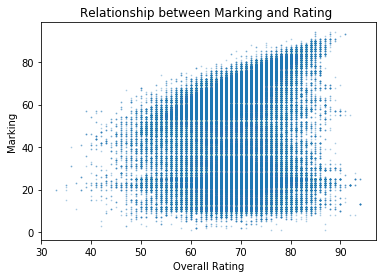

In [184]:
df_player.plot(x='overall_rating', y='marking', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Marking and Rating ');
plt.xlabel('Overall Rating')
plt.ylabel('Marking');

Correlation between dribbling and rating 

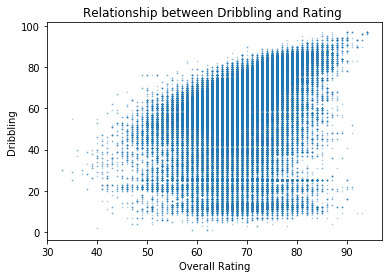

In [185]:
df_player.plot(x='overall_rating', y='dribbling', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Dribbling and Rating ');
plt.xlabel('Overall Rating')
plt.ylabel('Dribbling');

Correlation between strength and rating 

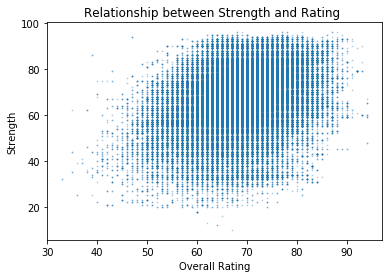

In [186]:
df_player.plot(x='overall_rating', y='strength', kind='scatter', s=0.5, alpha = 0.3, title = 'Relationship between Strength and Rating ');
plt.xlabel('Overall Rating')
plt.ylabel('Strength');

<a id='limitations'></a>

### Limitations:

>During my analysis, I Noted that some players table are missing from the information of table hence causing missed values.

>The players' name  are duplicated and incomplete therefore making some results inaccurated. I resolved to go looking for the full names to disable the matching result.

>In the Player Attributes' table, I found out that "the buildUpPlayDribbling" column has a huge missed value and if I dropped rows, I'll lose more players. I thought that I will remove the column until I fill in the missed values.

> I also noted that some Match table values are missing from the information of table therefore resulting to missed values.

>All Date that was in the dataset came as string so I had to convert it to datetime.

>Generally, most of the challenges I encountered were mostly in missed values and duplicated records.


<a id='conclusions'></a>
## Conclusions
*From my analysis above, I concluded as follows:*
>I found that all leagues do not have the same number of matches in one season. Each league has a different number of teams. There were a total of 3326 matches played in the 2016 season.

>The team that had the most number of wins in the 2015/16 season was Paris Saint-Germain whom won a total of 30 games.

>The teams that had the least number of lost matches in 2016 are Sporting CP, Paris Saint Germain, PSV, Ajax and Bayern Munich all having lost two matches each.

>Rickie Lambert, Mario Balotelli , Xavi Hernandez , Andrea Pirlo and Paul Scholes were the greatest penalty scorers in total and hence had the most penalties scored.

>I found out that the team attributes that led to most victories were buildUpPlaySpeed, buildUpPlayPassing, chanceCreationPassing, chanceCreationCrossing, chanceCreationShooting, defencePressure, defenceAggression and a great defenceTeamWidth.

>There were 12 players who had an overall rating of 90 and above.
 
 >The attributes that contributed to the players' overall rating were a high perfection in skills like freekick accuracy, heading, a high shot power, great man marking, strength and great dribbling skills.
 
>I also noticed that England Premier League, France Ligue 1, Italy Serie A and Spain LIGA BBVA had the most number of games in the 2016 season: A total of 380 Matches. 

>The league with the highest number of wins in 2016 season was Spain LIGA BBVA (288 wins) followed by Italy Serie A (285).



In [187]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255